In [45]:
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
from networkx.algorithms.community import k_clique_communities
from itertools import combinations


In [46]:
columns = ["TweetID", "Tweet_Text", "DateTime", "Location"]

classico = pd.read_csv(r"C:\Users\Alaa\Desktop\Assignment 2 SNA\Clasico.txt", sep="$", header=None, names=columns, index_col=False, engine='python')

classico["Tweet_Text"] = classico["Tweet_Text"].str.strip('|')
classico["DateTime"] = classico["DateTime"].str.strip('|')
classico.drop("Location", axis=1, inplace=True)

classico.head()


C:\Users\Alaa\AppData\Local\Temp\ipykernel_13604\4046922685.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  classico = pd.read_csv(r"C:\Users\Alaa\Desktop\Assignment 2 SNA\Clasico.txt", sep="$", header=None, names=columns, index_col=False, engine='python')


,TweetID,Tweet_Text,DateTime
0,0,Barcelona now have the same number of wins as...,2019-02-27 23:59:57
1,1,El Clasico Record 241 Games 95 RealMadrid Win...,2019-02-27 23:59:56
2,2,Ousmane Dembele El Clasico stats Games 2 Goal...,2019-02-27 23:59:44
3,3,Mandatory Clasico stat Sergio Ramos extends h...,2019-02-27 23:59:42
4,4,That s how you take a pen in a Cl sico My word,2019-02-27 23:59:39


In [47]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(classico['Tweet_Text'].values.astype('U'))
text_similarity_matrix = cosine_similarity(tfidf_matrix)

classico['DateTime'] = pd.to_datetime(classico['DateTime'])
classico['DateTime'] = classico['DateTime'].apply(lambda x: datetime.timestamp(x))

classico

,TweetID,Tweet_Text,DateTime
0,0,Barcelona now have the same number of wins as...,1.551305e+09
1,1,El Clasico Record 241 Games 95 RealMadrid Win...,1.551305e+09
2,2,Ousmane Dembele El Clasico stats Games 2 Goal...,1.551305e+09
3,3,Mandatory Clasico stat Sergio Ramos extends h...,1.551305e+09
4,4,That s how you take a pen in a Cl sico My word,1.551305e+09
...,...,...,...
1525,1525,So far this Clasico is the most disappointing ...,1.551294e+09
1526,1526,MHafeez22 Wavoo You gona for El clasico,1.551294e+09
1527,1527,BPL or die but el Cl sico over anything and ev...,1.551294e+09
1528,1528,few things i take from the first half 1 clasic...,1.551294e+09


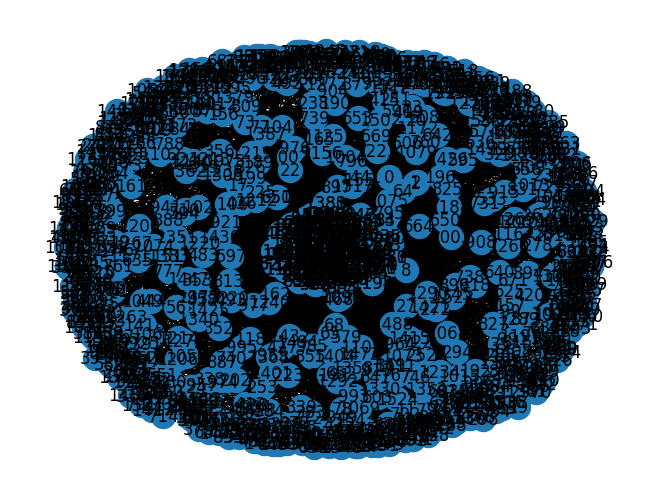

In [48]:
# sample_size = int(0.1 * len(classico))
# sampled_data = classico.sample(n=sample_size, random_state=42)

G = nx.Graph()

edge_weight_threshold = 0.2
for i in range(len(classico)):
    for j in range(i + 1, len(classico)):
        text_similarity = text_similarity_matrix[i, j]

        time_difference = classico['DateTime'].iloc[i] - classico['DateTime'].iloc[j]

        if time_difference != 0:
            time_closeness = 1 / abs(time_difference)
        else:
            time_closeness = 1e6

        edge_weight = 0.6 * text_similarity + 0.4 * time_closeness
        
        if edge_weight >= edge_weight_threshold:
            G.add_edge(
                classico['TweetID'].iloc[i], 
                classico['TweetID'].iloc[j], 
                weight=round(edge_weight, 2)
            )

pos = nx.spring_layout(G, k=0.4)  

nx.draw(G, pos, with_labels=True)

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, bbox=dict(facecolor='none', edgecolor='none'))

plt.show()


In [49]:
graph_copy1 = G.copy()
graph_copy2 = G.copy()
graph_copy3 = G.copy()

In [50]:
def min_common_nodes_condition(G, node1, node2, min_common_nodes):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    common_nodes = neighbors1.intersection(neighbors2)
    return len(common_nodes) >= min_common_nodes

# K-Core

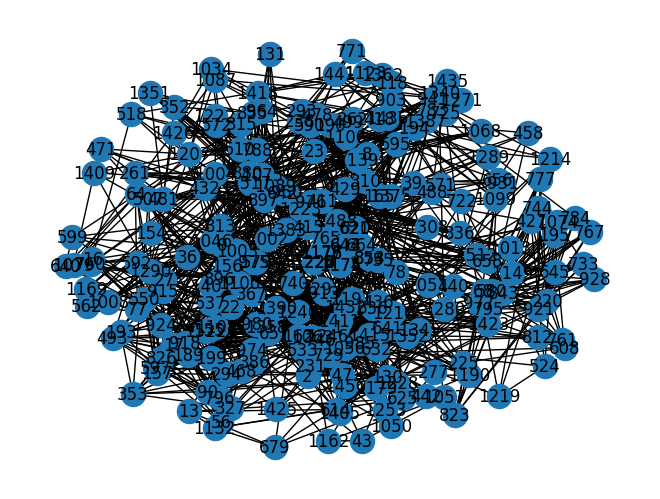

In [51]:
k_core = nx.k_core(graph_copy1, k=5)

pos = nx.spring_layout(k_core, k=.5, seed=42)

nx.draw(k_core, pos, with_labels=True)
plt.show()


Number of Nodes (Before): 235
Number of Edges (Before): 1247
Number of Nodes (After): 232
Number of Edges (After): 1130


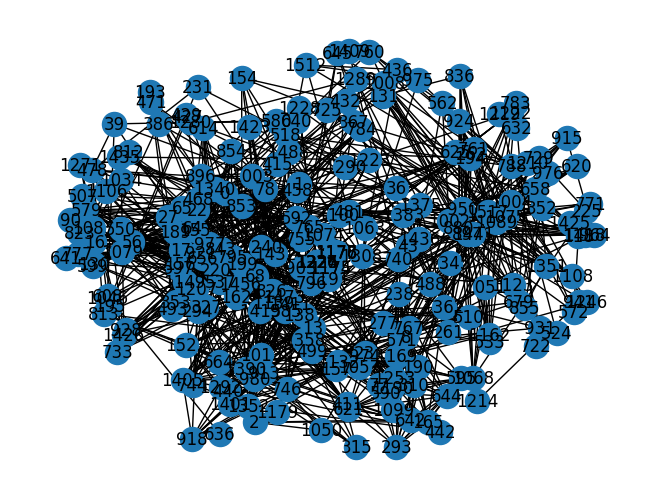

Number of Nodes (Before): 232
Number of Edges (Before): 1130
Number of Nodes (After): 215
Number of Edges (After): 1116


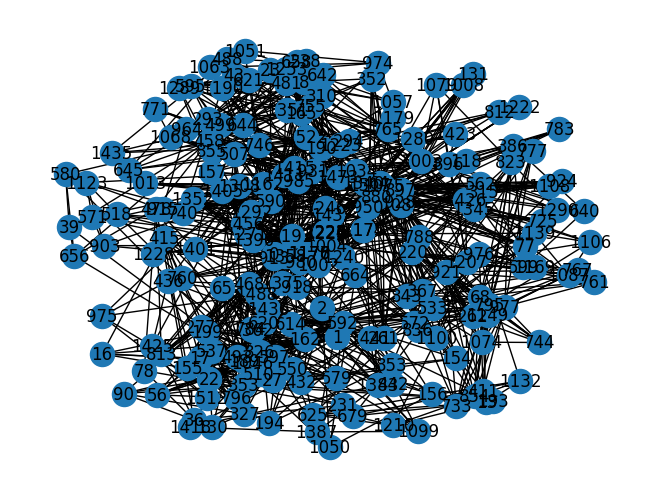

Condition is satisfied


In [52]:
while True:
    edges_to_remove = []

    # Iterate through edges and check the condition
    for edge in k_core.edges():
        node1, node2 = edge
        if not min_common_nodes_condition(k_core, node1, node2, min_common_nodes=3):
            edges_to_remove.append(edge)

    # Break if no edges to remove
    if not edges_to_remove:
        print("Condition is satisfied")
        break
        
# Print number of nodes and edges before removal
    num_nodes_before = k_core.number_of_nodes()
    num_edges_before = k_core.number_of_edges()
    print(f"Number of Nodes (Before): {num_nodes_before}")
    print(f"Number of Edges (Before): {num_edges_before}")
    # Remove edges that don't meet the condition
    k_core.remove_edges_from(edges_to_remove)

    # Remove nodes with zero degree
    isolated_nodes = [node for node in k_core.nodes() if k_core.degree(node) == 0]
    k_core.remove_nodes_from(isolated_nodes)

    # Print number of nodes and edges after removal
    num_nodes_after = k_core.number_of_nodes()
    num_edges_after = k_core.number_of_edges()
    print(f"Number of Nodes (After): {num_nodes_after}")
    print(f"Number of Edges (After): {num_edges_after}")

    # Visualize the updated graph
    pos = nx.spring_layout(k_core, k=0.5,seed=42)  
    nx.draw(k_core, pos, with_labels=True)
    plt.show()


Number of Nodes (Before): 188
Number of Edges (Before): 1026
Number of Nodes (After): 188
Number of Edges (After): 1025


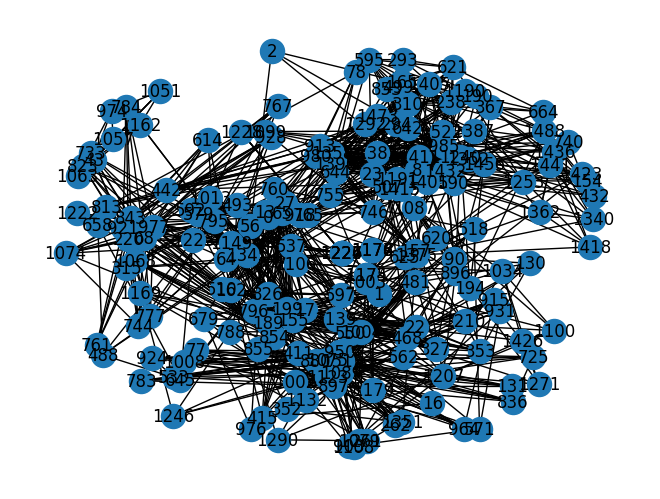

Condition is satisfied
Number of Nodes (final): 187
Number of Edges (final): 1021


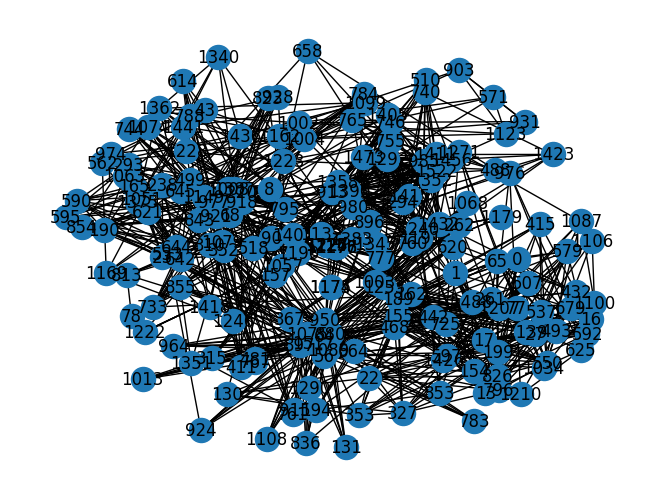

In [53]:
k_core_copy = k_core.copy()
while True:
    k_core_copy = nx.k_core(k_core_copy, k=5)
    
    edges_to_remove = []

    # Iterate through edges and check the condition
    for edge in k_core_copy.edges():
        node1, node2 = edge
        if not min_common_nodes_condition(k_core_copy, node1, node2, min_common_nodes=3):
            edges_to_remove.append(edge)

    # Break if no edges to remove
    if not edges_to_remove:
        print("Condition is satisfied")
        num_nodes_final = k_core_copy.number_of_nodes()
        num_edges_final = k_core_copy.number_of_edges()
        print(f"Number of Nodes (final): {num_nodes_final}")
        print(f"Number of Edges (final): {num_edges_final}")
        pos = nx.spring_layout(k_core_copy, k=0.5)  
        nx.draw(k_core_copy, pos, with_labels=True)
        plt.show()
        break
        
# Print number of nodes and edges before removal
    num_nodes_before = k_core_copy.number_of_nodes()
    num_edges_before = k_core_copy.number_of_edges()
    print(f"Number of Nodes (Before): {num_nodes_before}")
    print(f"Number of Edges (Before): {num_edges_before}")
    # Remove edges that don't meet the condition
    k_core_copy.remove_edges_from(edges_to_remove)

    # Remove nodes with zero degree
    isolated_nodes = [node for node in k_core_copy.nodes() if k_core_copy.degree(node) == 0]
    k_core_copy.remove_nodes_from(isolated_nodes)

    # Print number of nodes and edges after removal
    num_nodes_after = k_core_copy.number_of_nodes()
    num_edges_after = k_core_copy.number_of_edges()
    print(f"Number of Nodes (After): {num_nodes_after}")
    print(f"Number of Edges (After): {num_edges_after}")

    # Visualize the updated graph
    pos = nx.spring_layout(k_core_copy, k=0.5)  
    nx.draw(k_core_copy, pos, with_labels=True)
    plt.show()


In [54]:
tweets_df = classico.copy()

tweets_df['DateTime'] = pd.to_datetime(tweets_df['DateTime'], unit='s')

communities = list(nx.connected_components(k_core))

community_dataframes = []

for idx, community in enumerate(communities):
    community_df = tweets_df[tweets_df['TweetID'].isin(community)].copy()
    community_df['Community'] = idx + 1  # Assign a community label
    community_dataframes.append(community_df)

result_df = pd.concat(community_dataframes, ignore_index=True)

result_df


,TweetID,Tweet_Text,DateTime,Community
0,0,Barcelona now have the same number of wins as...,2019-02-27 21:59:57,1
1,1,El Clasico Record 241 Games 95 RealMadrid Win...,2019-02-27 21:59:56,1
2,16,iamdiegocc Milis_MC We tied with Clasico wins,2019-02-27 21:58:26,1
3,17,Barcelona and Real Madrid are tied at 95 Clas...,2019-02-27 21:58:10,1
4,22,Barcelona and Real Madrid are now level on al...,2019-02-27 21:57:57,1
...,...,...,...,...
210,1175,Again they have Suarez We got Benz One steps ...,2019-02-27 19:33:17,9
211,1176,The funniest thing about this shit is both tea...,2019-02-27 19:33:16,9
212,1177,Looks like LuisSuarez9 has had that big impact...,2019-02-27 19:33:16,9
213,1178,surprised Messi didn t take it guess he doesn ...,2019-02-27 19:33:16,9


# k-truss after k-core

Number of Nodes : 235
Number of Edges : 1224


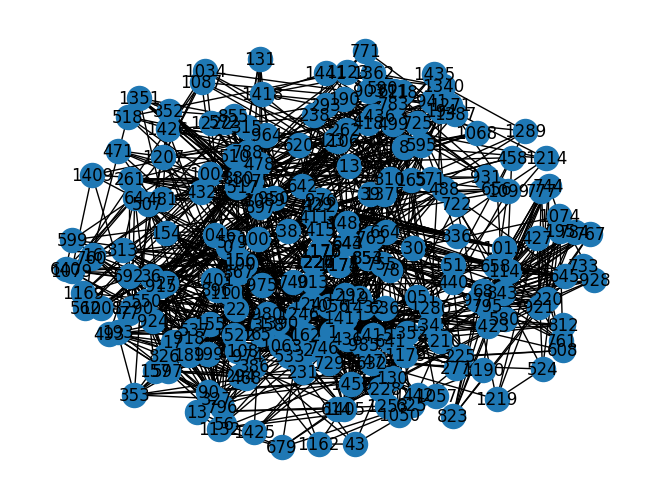

In [55]:
graph_copy4 = G.copy()
k_core2 = nx.k_core(graph_copy4, k=5)

k_truss_graph = nx.k_truss(k_core2, k=3)

pos_k_truss = nx.spring_layout(k_truss_graph, k=0.5, seed=42)
nx.draw(k_truss_graph, pos_k_truss, with_labels=True)
num_nodes = k_truss_graph.number_of_nodes()
num_edges = k_truss_graph.number_of_edges()
print(f"Number of Nodes : {num_nodes}")
print(f"Number of Edges : {num_edges}")
plt.show()


In [56]:
core_truss_communities = list(nx.connected_components(k_truss_graph))
core_truss_community_dataframes = []

for idx, community in enumerate(core_truss_communities):
    community_df = tweets_df[tweets_df['TweetID'].isin(community)].copy()
    community_df['Community'] = idx + 1  
    core_truss_community_dataframes.append(community_df)


core_truss_result_df = pd.concat(core_truss_community_dataframes, ignore_index=True)


core_truss_result_df


,TweetID,Tweet_Text,DateTime,Community
0,0,Barcelona now have the same number of wins as...,2019-02-27 21:59:57,1
1,1,El Clasico Record 241 Games 95 RealMadrid Win...,2019-02-27 21:59:56,1
2,2,Ousmane Dembele El Clasico stats Games 2 Goal...,2019-02-27 21:59:44,1
3,8,Ousmane Dembele has more assists in El Clasic...,2019-02-27 21:59:15,1
4,13,The man lives for El Clasico goals,2019-02-27 21:58:47,1
...,...,...,...,...
230,974,FCBNewsRoom This has got to be the weirdest E...,2019-02-27 19:43:39,2
231,1051,FCBNewsRoom This has got to be the weirdest E...,2019-02-27 19:38:25,2
232,1057,totalBarca This has got to be the weirdest El...,2019-02-27 19:38:01,2
233,1063,IBES16 This has got to be the weirdest El Cl ...,2019-02-27 19:37:52,2


# K-clique

cliques: [frozenset({0, 1, 130, 16, 17, 22, 537, 155, 796, 27, 415, 162, 550, 56, 826, 189, 65, 579, 199, 327, 592, 468, 597, 90, 353, 493, 507}), frozenset({1345, 642, 644, 8, 590, 595, 23, 664, 165, 293, 621, 238, 499, 310, 190}), frozenset({976, 625, 679, 1210, 1132, 13}), frozenset({1057, 1063, 1051, 1162, 43, 974}), frozenset({896, 1411, 1415, 1292, 1423, 913, 918, 1432, 157, 1190, 294, 1191, 813, 1456, 442, 315, 64, 1473, 1352, 1358, 78, 1488, 980, 1240, 985, 740, 1253, 746, 1003, 1390, 1522, 755, 1401, 1405, 510}), frozenset({68, 777, 843, 784, 977, 854, 921, 411, 795, 220, 733, 928, 162, 614, 744, 1074, 823, 761, 1149, 767}), frozenset({1089, 897, 131, 964, 261, 262, 1351, 836, 77, 783, 915, 1108, 533, 725, 855, 924, 352, 481, 620, 1517, 1068, 880, 1008, 1075, 1013, 950}), frozenset({658, 755, 645, 1223, 488, 765}), frozenset({1169, 562, 788, 1002, 1004, 1246}), frozenset({1123, 931, 903, 1002, 571, 1004}), frozenset({1034, 1100, 1426, 1139, 1106, 1207, 1271, 1087}), frozenset(

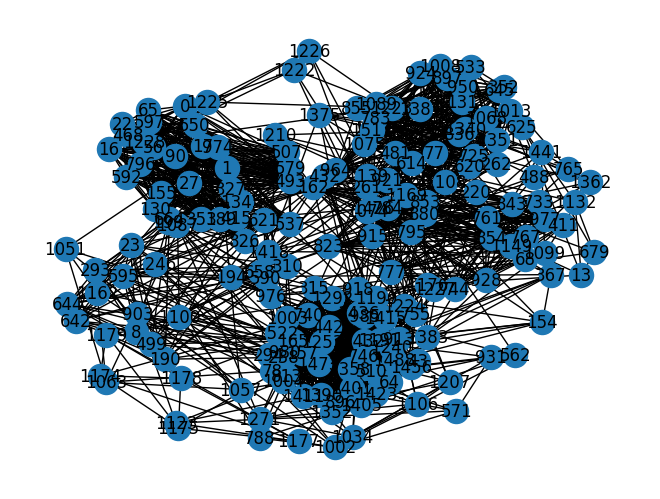

In [57]:
def add_nodes_and_edges(graph, nodes):
    nodes = [int(node) for node in nodes]
    graph.add_nodes_from(nodes)
    graph.add_edges_from(combinations(nodes, 2))
    
cliques = list(k_clique_communities(graph_copy2, 6))
cliques_graph = nx.Graph()

for clique in cliques:
    add_nodes_and_edges(cliques_graph, clique)
    
pos = nx.spring_layout(cliques_graph, k=0.9, seed = 42)  

nx.draw(cliques_graph, pos, with_labels=True)

print("cliques:", cliques)
num_nodes = cliques_graph.number_of_nodes()
num_edges = cliques_graph.number_of_edges()
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
plt.show()


In [58]:
while True:
    edges_to_remove = []

    # Iterate through edges and check the condition
    for edge in cliques_graph.edges():
        node1, node2 = edge
        if not min_common_nodes_condition(cliques_graph, node1, node2, min_common_nodes=3):
            edges_to_remove.append(edge)

    # Break if no edges to remove
    if not edges_to_remove:
        print("Condition is satisfied")
        break
        
    # Print number of nodes and edges before removal
    num_nodes_before = cliques_graph.number_of_nodes()
    num_edges_before = cliques_graph.number_of_edges()
    print(f"Number of Nodes (Before): {num_nodes_before}")
    print(f"Number of Edges (Before): {num_edges_before}")

    # Remove edges that don't meet the condition
    cliques_graph.remove_edges_from(edges_to_remove)

    # Remove nodes with zero degree
    isolated_nodes = [node for node in cliques_graph.nodes() if cliques_graph.degree(node) == 0]
    cliques_graph.remove_nodes_from(isolated_nodes)

    # Print number of nodes and edges after removal
    num_nodes_after = cliques_graph.number_of_nodes()
    num_edges_after = cliques_graph.number_of_edges()
    print(f"Number of Nodes (After): {num_nodes_after}")
    print(f"Number of Edges (After): {num_edges_after}")

    # Visualize the updated graph
    pos = nx.spring_layout(cliques_graph, k=0.5)  
    nx.draw(cliques_graph, pos, with_labels=True)
    plt.show()


Condition is satisfied


In [59]:
clique_communities = list(nx.connected_components(cliques_graph))

clique_community_dataframes = []

for idx, community in enumerate(clique_communities):
    community_df = tweets_df[tweets_df['TweetID'].isin(community)].copy()
    community_df['Community'] = idx + 1  # Assign a community label
    clique_community_dataframes.append(community_df)

clique_result_df = pd.concat(clique_community_dataframes, ignore_index=True)

clique_result_df


,TweetID,Tweet_Text,DateTime,Community
0,0,Barcelona now have the same number of wins as...,2019-02-27 21:59:57,1
1,1,El Clasico Record 241 Games 95 RealMadrid Win...,2019-02-27 21:59:56,1
2,16,iamdiegocc Milis_MC We tied with Clasico wins,2019-02-27 21:58:26,1
3,17,Barcelona and Real Madrid are tied at 95 Clas...,2019-02-27 21:58:10,1
4,22,Barcelona and Real Madrid are now level on al...,2019-02-27 21:57:57,1
...,...,...,...,...
178,1175,Again they have Suarez We got Benz One steps ...,2019-02-27 19:33:17,10
179,1176,The funniest thing about this shit is both tea...,2019-02-27 19:33:16,10
180,1177,Looks like LuisSuarez9 has had that big impact...,2019-02-27 19:33:16,10
181,1178,surprised Messi didn t take it guess he doesn ...,2019-02-27 19:33:16,10


# K-truss

Number of Nodes: 183
Number of Edges: 1770


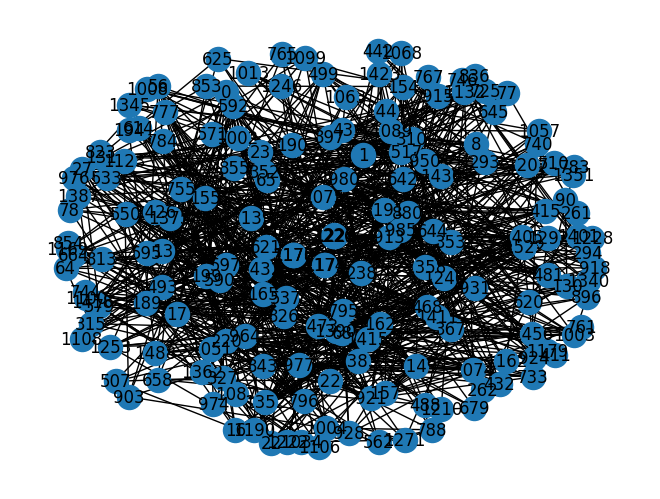

In [60]:
k_truss = nx.k_truss(graph_copy3, k=6)

pos = nx.spring_layout(k_truss, k = .9, seed = 42 )
nx.draw(k_truss, pos, with_labels=True)
num_nodes = cliques_graph.number_of_nodes()
num_edges = cliques_graph.number_of_edges()
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
plt.show()


In [61]:
while True:
    edges_to_remove = []

    # Iterate through edges and check the condition
    for edge in k_truss.edges():
        node1, node2 = edge
        if not min_common_nodes_condition(k_truss, node1, node2, min_common_nodes=3):
            edges_to_remove.append(edge)

    # Break if no edges to remove
    if not edges_to_remove:
        print("Condition is satisfied")
        break
        
    # Print number of nodes and edges before removal
    num_nodes_before = k_truss.number_of_nodes()
    num_edges_before = k_truss.number_of_edges()
    print(f"Number of Nodes (Before): {num_nodes_before}")
    print(f"Number of Edges (Before): {num_edges_before}")

    # Remove edges that don't meet the condition
    k_truss.remove_edges_from(edges_to_remove)

    # Remove nodes with zero degree
    isolated_nodes = [node for node in k_truss.nodes() if k_truss.degree(node) == 0]
    k_truss.remove_nodes_from(isolated_nodes)

    # Print number of nodes and edges after removal
    num_nodes_after = k_truss.number_of_nodes()
    num_edges_after = k_truss.number_of_edges()
    print(f"Number of Nodes (After): {num_nodes_after}")
    print(f"Number of Edges (After): {num_edges_after}")

    # Visualize the updated graph
    pos = nx.spring_layout(k_truss, k=0.5)  
    nx.draw(k_truss, pos, with_labels=True)
    plt.show()


Condition is satisfied


In [62]:
truss_communities = list(nx.connected_components(k_truss))
truss_community_dataframes = []

for idx, community in enumerate(truss_communities):
    community_df = tweets_df[tweets_df['TweetID'].isin(community)].copy()
    community_df['Community'] = idx + 1  # Assign a community label
    truss_community_dataframes.append(community_df)


truss_result_df = pd.concat(truss_community_dataframes, ignore_index=True)


truss_result_df


,TweetID,Tweet_Text,DateTime,Community
0,0,Barcelona now have the same number of wins as...,2019-02-27 21:59:57,1
1,1,El Clasico Record 241 Games 95 RealMadrid Win...,2019-02-27 21:59:56,1
2,16,iamdiegocc Milis_MC We tied with Clasico wins,2019-02-27 21:58:26,1
3,17,Barcelona and Real Madrid are tied at 95 Clas...,2019-02-27 21:58:10,1
4,22,Barcelona and Real Madrid are now level on al...,2019-02-27 21:57:57,1
...,...,...,...,...
178,1106,Suarez loves himself a clasico hat trick,2019-02-27 19:35:54,10
179,1139,Suarez loves the clasico,2019-02-27 19:34:37,10
180,1207,SUAREZ AT THE DOUBLE HE LOVES THE CLASICO ElCl...,2019-02-27 19:32:24,10
181,1271,Suarez loves a stat padding session in the cla...,2019-02-27 19:29:31,10


# Evaluation 

In [63]:
from networkx.algorithms.community.quality import modularity
import community  

def calculate_modularity(graph, partition):
    partition_dict = {i: [] for i in set(partition.values())}
    for node, community_id in partition.items():
        partition_dict[community_id].append(node)
    return modularity(graph, partition_dict.values())

k_core_partition = community.best_partition(k_core)
modularity_k_core = calculate_modularity(k_core, k_core_partition)

k_truss_partition = community.best_partition(k_truss)
modularity_k_truss = calculate_modularity(k_truss, k_truss_partition)

cliques_partition = community.best_partition(cliques_graph)
modularity_k_clique = calculate_modularity(cliques_graph, cliques_partition)

core_truss__partition = community.best_partition(k_truss_graph)
modularity_core_truss_clique = calculate_modularity(k_truss_graph, core_truss__partition)

print(f"Modularity (K-Core): {modularity_k_core}")
print(f"Modularity (K-Truss): {modularity_k_truss}")
print(f"Modularity (k-clique): {modularity_k_clique}")
print(f"Modularity (k-core_truss): {modularity_core_truss_clique}")


Modularity (K-Core): 0.5400805266865267
Modularity (K-Truss): 0.5400714352853754
Modularity (k-clique): 0.7701346994797154
Modularity (k-core_truss): 0.666715813236545


# K-Clique is the best one 

#### 